Loading libaries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df1 = pd.read_excel(r"C:\Users\HP\Downloads\QVI_transaction_data (1).xlsx")
df2 = pd.read_csv(r"C:\Users\HP\Downloads\QVI_purchase_behaviour (1).csv")

Inspecting Transaction Data

In [3]:
df1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
df1.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

we can see from that data types that Date is in the wrong format

In [5]:
df1['DATE'] = pd.to_datetime(pd.to_numeric(df1['DATE'],errors='coerce'),errors='coerce', origin= '1899-12-30', unit = 'D')
#changing the date column from integer to date

In [6]:
df1['DATE'].head

<bound method NDFrame.head of 0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: DATE, Length: 264836, dtype: datetime64[ns]>

In [16]:
df1.info()
shape_transaction = df1.shape

print('\n transaction dataset has {} rows and {} columns'.format(shape_transaction[0], shape_transaction[1]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB

 transaction dataset has 264836 rows and 8 columns


Cheaking for null values

In [8]:
df1.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [9]:
#inspecting customer data
df2.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [11]:
df2.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [13]:
df2.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [15]:
df2.info()
shape_purchase_behaviour = df2.shape

print('\n purchase_behaviour dataset has {} rows and {} columns'.format(shape_purchase_behaviour[0], shape_purchase_behaviour[1]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB

 purchase_behaviour dataset has 72637 rows and 3 columns


In [17]:
df1['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

Cleaning transaction data

In [18]:
df1.replace(['Kettle 135g Swt Pot Sea Salt'], 'Kettle Swt Pot Sea Salt 135g',inplace=True)

In [21]:
df1['PROD_NAME'] = df1['PROD_NAME'].str.replace('Chp', 'Chip')

In [23]:
#Splitting pack_size from PROD_NAME and storing them in a seperate variable
df1['Pack_size'] = df1['PROD_NAME'].str[-4:-1]
df1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack_size
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChipsHny&Jlpno Chili 150g,3,13.8,150


In [24]:
#Splitting Brand names from PROD_NAME and storing them in a seperate variable
df1['BRAND'] = df1['PROD_NAME'].str.extract('([A-Z]\w{0,})', expand=True)


In [25]:
df1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack_size,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChipsHny&Jlpno Chili 150g,3,13.8,150,Kettle


In [30]:
#Removing all salsas products using pack size
df = df1[df1["Pack_size"].str.contains("300")==False]


In [31]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack_size,BRAND,stuff
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,Cheese
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChipsHny&Jlpno Chili 150g,3,13.8,150,Kettle,Kettle


In [39]:
df = df.drop(columns=['stuff'])

In [35]:
df['Pack_size'].unique()

array(['175', '170', '150', '330', '210', '270', '220', '125', '110',
       '134', '380', '180', '165', '135', '250', '200', '160', '190',
       ' 90', ' 70'], dtype=object)

In [36]:
#cleaning the product name column
df['PROD_NAME'] = df['PROD_NAME'].str.replace('/', "")
df['PROD_NAME'] = df['PROD_NAME'].str.replace('&', "")
df['PROD_NAME'] = df['PROD_NAME'].str.replace('\d+', "" , regex=True)
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_10248\2646137826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PROD_NAME'] = df['PROD_NAME'].str.replace('/', "")
C:\Users\HP\AppData\Local\Temp\ipykernel_10248\2646137826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PROD_NAME'] = df['PROD_NAME'].str.replace('&', "")
C:\Users\HP\AppData\Local\Temp\ipykernel_10248\2646137826.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack_size,BRAND,stuff
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSaltg,2,6.0,175,Natural,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese g,3,6.3,175,CCs,Cheese
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken g,2,2.9,170,Smiths,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion g,5,15.0,175,Smiths,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChipsHnyJlpno Chili g,3,13.8,150,Kettle,Kettle


In [37]:
df['PROD_NAME'] = df['PROD_NAME'].str.rstrip('g')

C:\Users\HP\AppData\Local\Temp\ipykernel_10248\3993238841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PROD_NAME'] = df['PROD_NAME'].str.rstrip('g')


In [40]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack_size,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChipsHnyJlpno Chili,3,13.8,150,Kettle


In [41]:
df['BRAND'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

In [42]:
#cleaning brand column

df['BRAND'].replace('Red', 'RRD', inplace=True)
df['BRAND'].replace('Smith', 'Smiths', inplace=True)
df['BRAND'].replace('Infzns', 'Infuzions', inplace=True)
df['BRAND'].replace('Snbts', 'Sunbites', inplace=True)
df['BRAND'].replace('GrnWves', 'Grainwaves', inplace=True)
df['BRAND'].replace('Grain', 'Grainwaves', inplace=True)
df['BRAND'].replace('Natural', 'NCC', inplace=True)
df['BRAND'].replace('WW', 'Woolworths', inplace=True)
df['BRAND'].replace('Doritoes', 'Doritos', inplace=True)
#cleaning the brand names

In [43]:
df['BRAND'].unique()

array(['NCC', 'CCs', 'Smiths', 'Kettle', 'Grainwaves', 'Doritos',
       'Twisties', 'Woolworths', 'Thins', 'Burger', 'Cheezels',
       'Infuzions', 'RRD', 'Pringles', 'Dorito', 'Tyrrells', 'Cobs',
       'French', 'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

 Performing Explorative Data Analysis

In [44]:
df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,249670.000000,2.496700e+05,2.496700e+05,249670.000000,249670.000000,249670.000000
mean,135.044278,1.355203e+05,1.351234e+05,56.294288,1.907762,7.293966
std,76.773591,8.065746e+04,7.813155e+04,33.528758,0.657126,3.071796
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001625e+04,6.757425e+04,27.000000,2.000000,5.700000
50%,130.000000,1.303600e+05,1.351475e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030798e+05,2.026338e+05,86.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


From our summary statisics we can see that the highest quantity of product purchased is 200. Lets look futher at that

In [45]:
QTY = [200]
df['PROD_QTY'].isin(QTY)
df[df['PROD_QTY'].isin(QTY)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack_size,BRAND
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chip Supreme,200,650.0,380,Dorito
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chip Supreme,200,650.0,380,Dorito


From this we can see that this purchases are from the same customer, lets see if the customer made any other purchases

In [46]:
df.loc[df['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack_size,BRAND
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chip Supreme,200,650.0,380,Dorito
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chip Supreme,200,650.0,380,Dorito


we can see that the customer made no other purchase and can be assumed to be buying for commercial purposes. This therefore means we can assume them to be an outlier. 

In [47]:
df.drop([69762, 69763], inplace = True )

In [48]:
df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,249668.000000,2.496680e+05,2.496680e+05,249668.000000,249668.000000,249668.000000
mean,135.043550,1.355196e+05,1.351227e+05,56.294707,1.906175,7.288817
std,76.773467,8.065737e+04,7.813144e+04,33.528566,0.342744,2.475279
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001600e+04,6.757375e+04,27.000000,2.000000,5.700000
50%,130.000000,1.303595e+05,1.351465e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030790e+05,2.026322e+05,86.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [49]:
df['DATE'].nunique()
#examing the data over time to see if there are any missing values

364

In [50]:
# looking for the missing date
pd.date_range(start = '2018-07-01', end = '2019-06-30').difference(df['DATE'])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

The date missing is christmas which makes sense as most stores are closed on that day

In [55]:
#grouping data by date

groupby_date = df.groupby('DATE').sum()
print(groupby_date)

            STORE_NBR  LYLTY_CARD_NBR    TXN_ID  PROD_NBR  PROD_QTY  TOT_SALES
DATE                                                                          
2018-07-01      90280        90389636  90234109     38769      1289     4962.9
2018-07-02      87130        87234845  87111526     37168      1274     4938.1
2018-07-03      94490        94603086  94643683     39385      1315     5005.7
2018-07-04      93505        93616386  93525068     38172      1306     5020.9
2018-07-05      89818        89922491  89888989     39337      1264     4698.2
...               ...             ...       ...       ...       ...        ...
2019-06-26      90276        91800865  90104449     37302      1277     4898.3
2019-06-27      87757        87871278  87769362     37605      1286     4967.9
2019-06-28      95271        96087160  95320362     39070      1312     4940.4
2019-06-29      94783        97797369  94715557     38048      1364     5201.2
2019-06-30      95933        96045214  95913814     

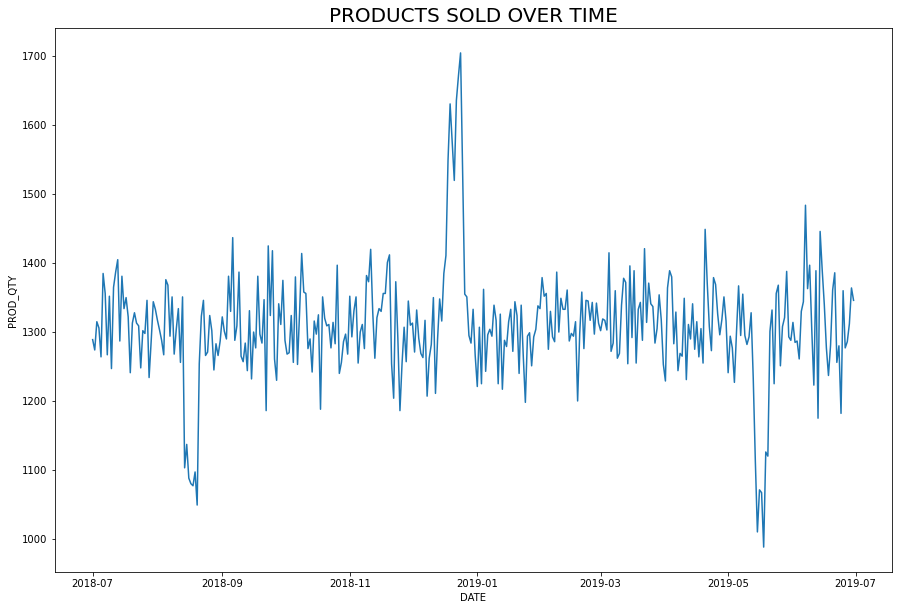

In [58]:
plt.rcParams['figure.figsize'] = (15,10)
Products_sold = groupby_date['PROD_QTY']

sns.lineplot(data = Products_sold)
plt.title('PRODUCTS SOLD OVER TIME',fontsize=20 )
plt.show()

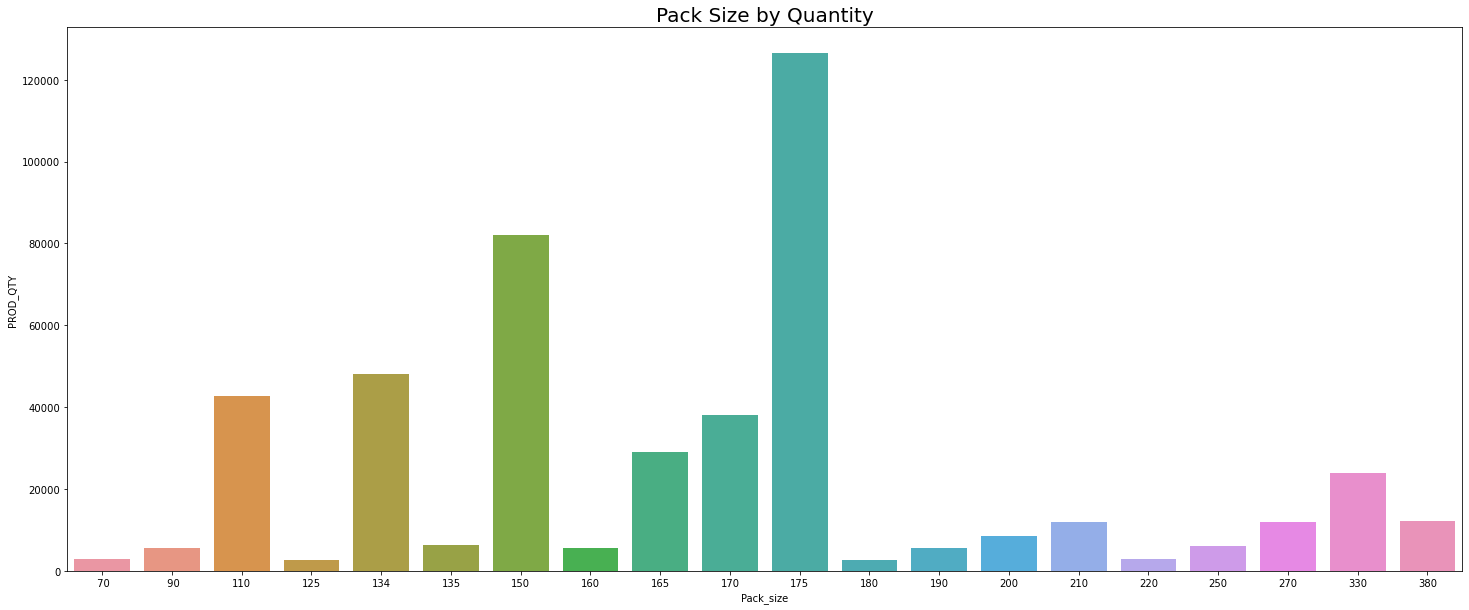

In [125]:
#Seeing which Pack Size brings the highest sales
groupby_weight = df.groupby('Pack_size',as_index = False).sum()

plt.rcParams['figure.figsize'] = (25,10)
sns.barplot(data = groupby_weight, x = groupby_weight['Pack_size'], y=groupby_weight['PROD_QTY'])
plt.title('Pack Size by Quantity',fontsize=20 )
plt.show()


From the chart we can see that the pack size 175 sells the most

In [60]:
df2.head()


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [64]:
df2.nunique()

LYLTY_CARD_NBR      72637
LIFESTAGE               7
PREMIUM_CUSTOMER        3
dtype: int64

no missing values here

In [65]:
df2['LIFESTAGE'].value_counts().sort_values()

NEW FAMILIES               2549
MIDAGE SINGLES/COUPLES     7275
YOUNG FAMILIES             9178
OLDER FAMILIES             9780
YOUNG SINGLES/COUPLES     14441
OLDER SINGLES/COUPLES     14609
RETIREES                  14805
Name: LIFESTAGE, dtype: int64

Text(0.5, 1.0, 'COUNT OF LIFESTAGES')

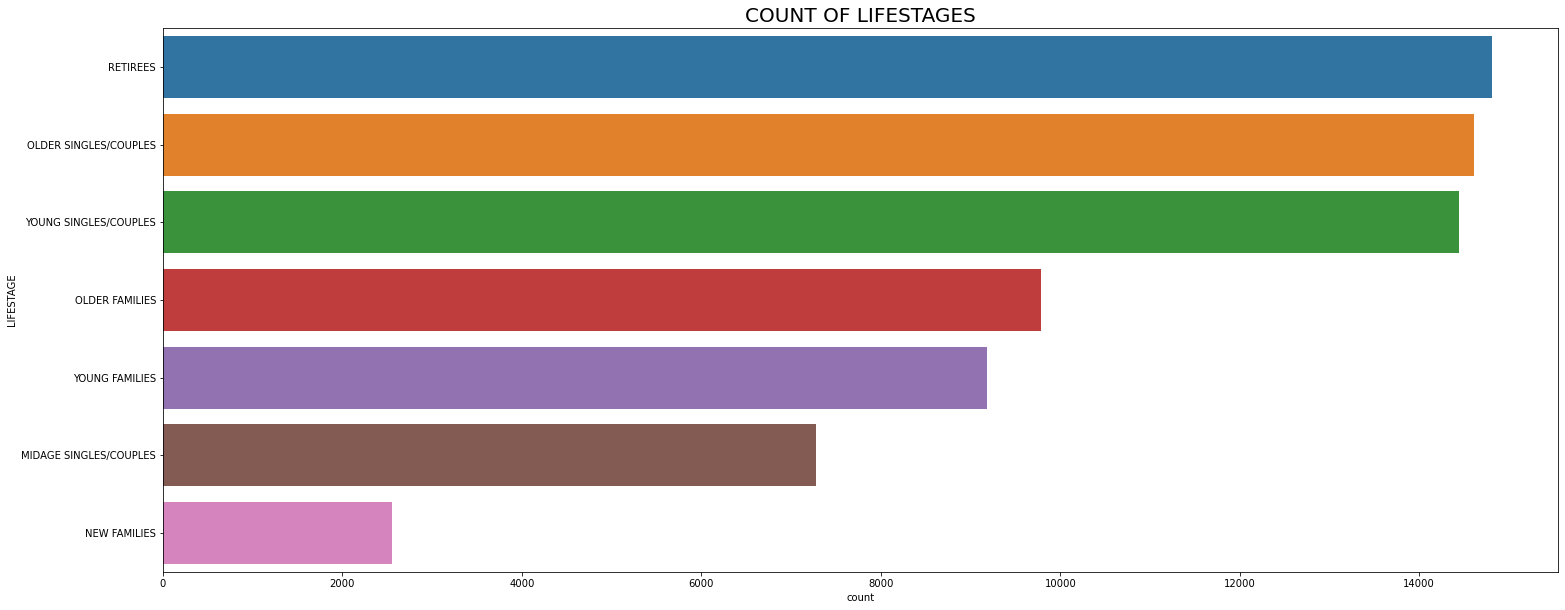

In [126]:
sns.countplot(y = df2['LIFESTAGE'], order = df2['LIFESTAGE'].value_counts().index)
plt.title('COUNT OF LIFESTAGES',fontsize=20 )

Text(0.5, 1.0, 'NUMBER OF CUSTOMERS OF PREMIUM CUSTOMERS')

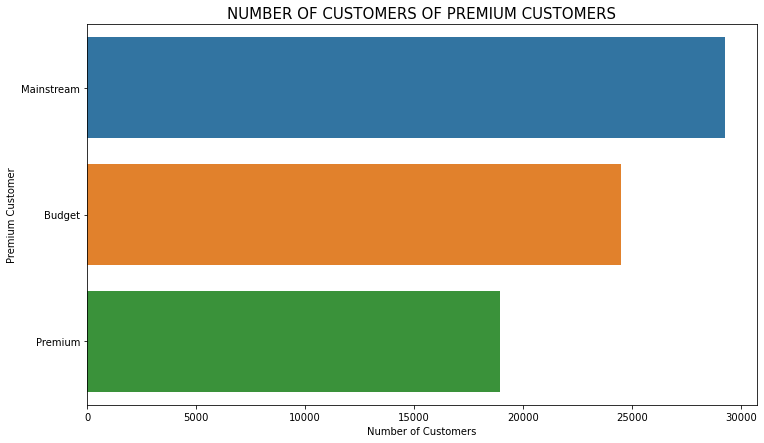

In [127]:
plt.figure(figsize = (12, 7))
sns.countplot(y = df2['PREMIUM_CUSTOMER'], order = df2['PREMIUM_CUSTOMER'].value_counts().index)
plt.xlabel('Number of Customers')
plt.ylabel('Premium Customer')
plt.title('NUMBER OF CUSTOMERS OF PREMIUM CUSTOMERS',fontsize=15 )

In [70]:
# combining the two datasets into one
data = pd.merge(df, df2,on=['LYLTY_CARD_NBR','LYLTY_CARD_NBR'])
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack_size,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,NCC,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,160,Woolworths,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,175,CCs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [72]:
data.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
Pack_size           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249668 entries, 0 to 249667
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              249668 non-null  datetime64[ns]
 1   STORE_NBR         249668 non-null  int64         
 2   LYLTY_CARD_NBR    249668 non-null  int64         
 3   TXN_ID            249668 non-null  int64         
 4   PROD_NBR          249668 non-null  int64         
 5   PROD_NAME         249668 non-null  object        
 6   PROD_QTY          249668 non-null  int64         
 7   TOT_SALES         249668 non-null  float64       
 8   Pack_size         249668 non-null  object        
 9   BRAND             249668 non-null  object        
 10  LIFESTAGE         249668 non-null  object        
 11  PREMIUM_CUSTOMER  249668 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 24.8+ MB


# Data Analysis
 
Now that our data is ready for analysis, we can answer some questions that the client wants such as:

1.Who spends the most on chips, describing customers by lifestage and how premium their general purchasing behaviour is
2.How many customers are in each segment
3.How many chips are bought per customer by segment
4.What is the average chip price by customer segment

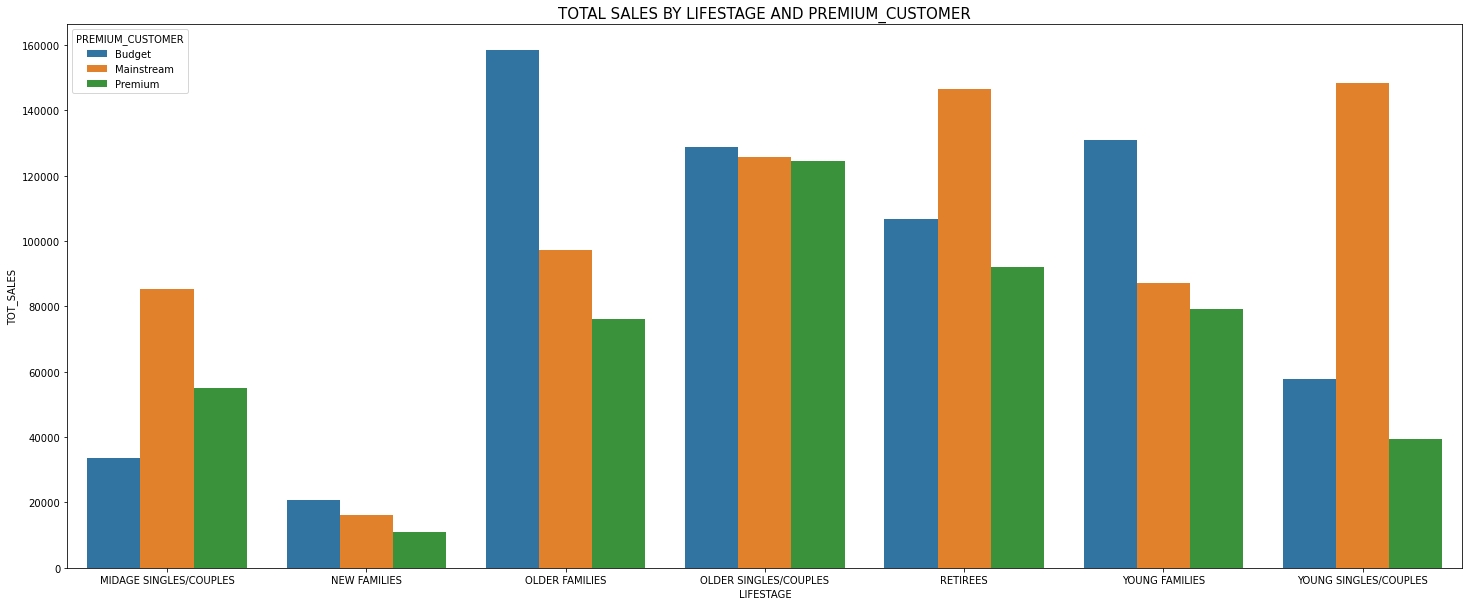

In [74]:
x = data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'],as_index = False).sum()
sns.barplot(x = x['LIFESTAGE'], y = x['TOT_SALES'], hue = x['PREMIUM_CUSTOMER'])
plt.title('TOTAL SALES BY LIFESTAGE AND PREMIUM_CUSTOMER',fontsize=15 )
plt.show()

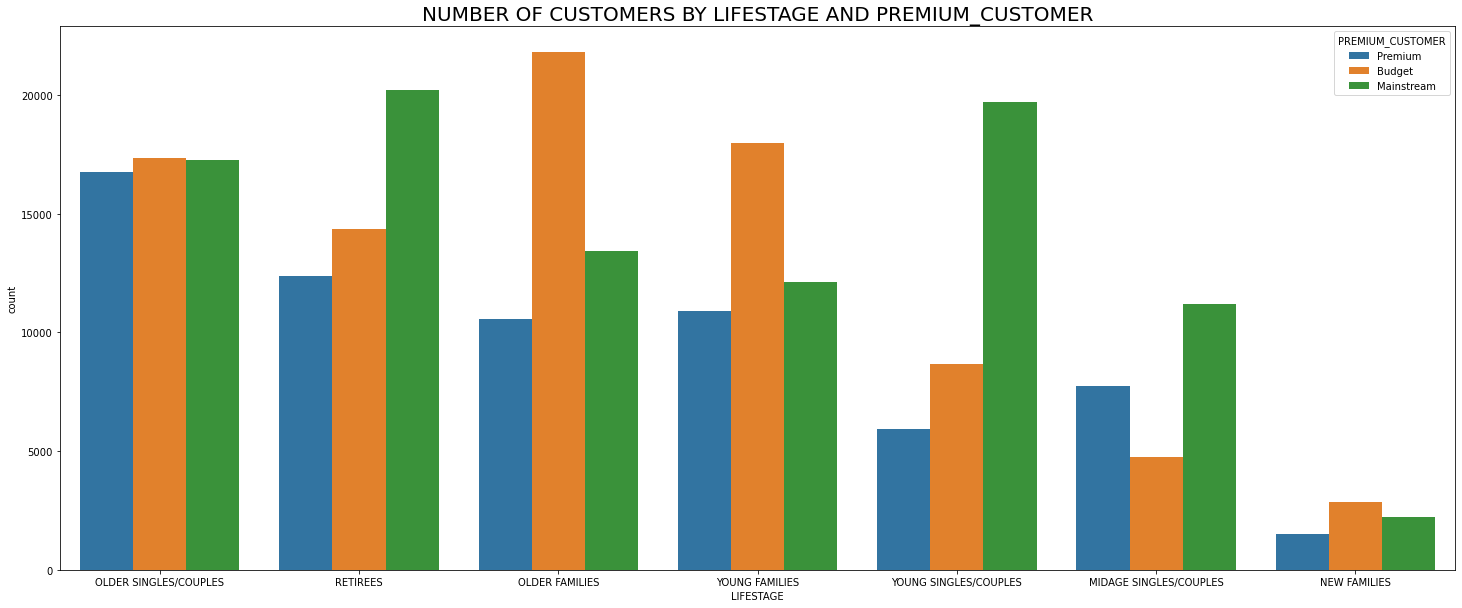

In [75]:
sns.countplot(data=data, x='LIFESTAGE', hue = 'PREMIUM_CUSTOMER', order=data['LIFESTAGE'].value_counts().index)
plt.title('NUMBER OF CUSTOMERS BY LIFESTAGE AND PREMIUM_CUSTOMER',fontsize=20 )
plt.show()


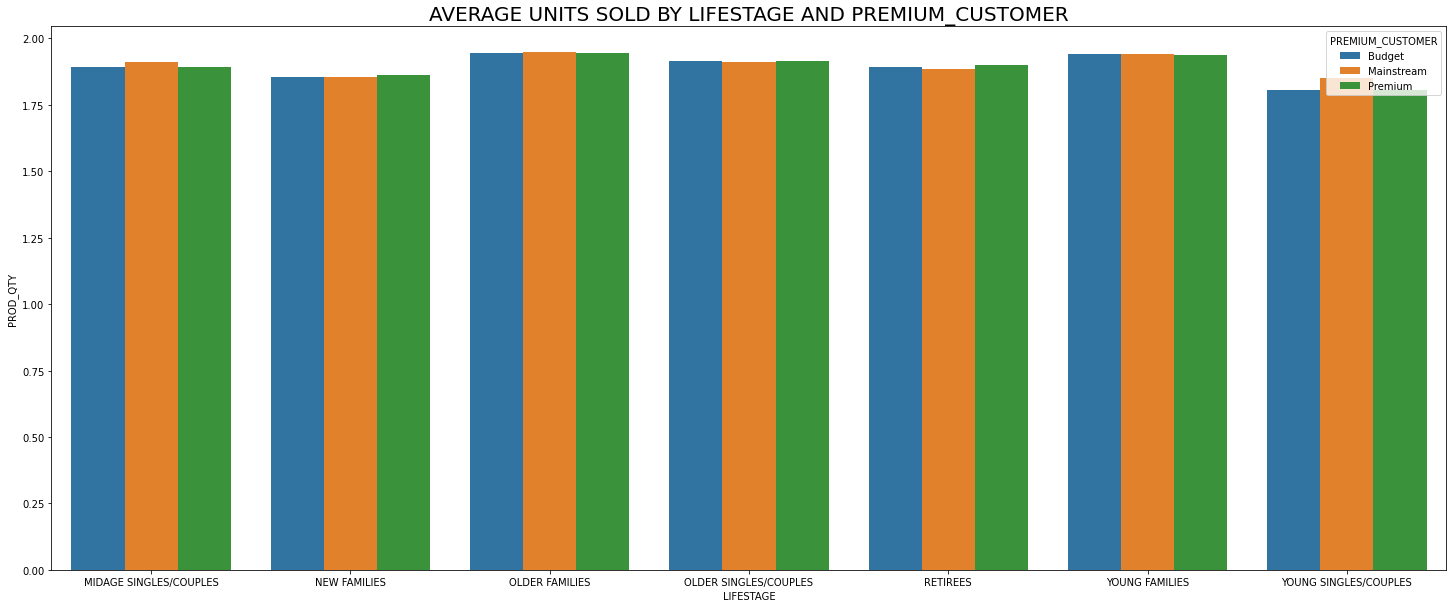

In [76]:
x = data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'],as_index = False).mean()
sns.barplot(x = x['LIFESTAGE'], y = x['PROD_QTY'], hue = x['PREMIUM_CUSTOMER'])
plt.title('AVERAGE UNITS SOLD BY LIFESTAGE AND PREMIUM_CUSTOMER',fontsize=20 )
plt.show()


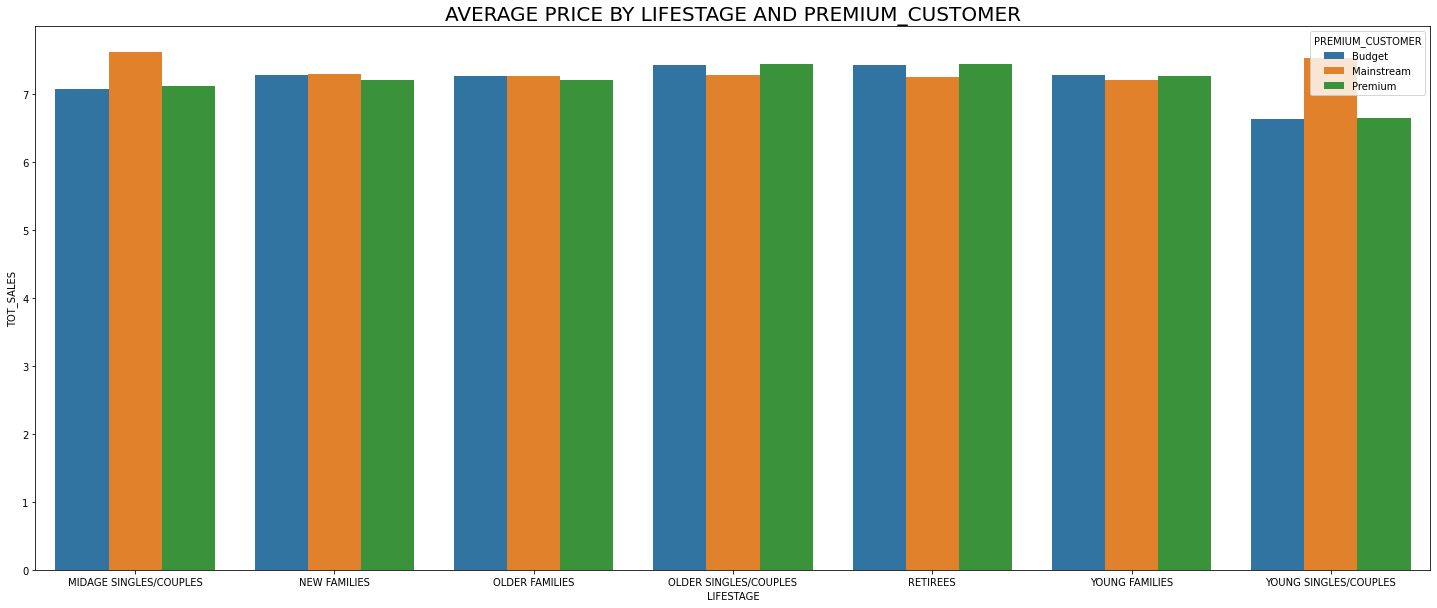

In [77]:
x = data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'],as_index = False).mean()
sns.barplot(x = x['LIFESTAGE'], y = x['TOT_SALES'], hue = x['PREMIUM_CUSTOMER'])
plt.title('AVERAGE PRICE BY LIFESTAGE AND PREMIUM_CUSTOMER',fontsize=20 )
plt.show()


Looking at the average price we can see there isnt much of a difference. We can test to see if its statistically significant

we are performing an independent t-test between mainstream vs non-mainstream midage and young singles/couples to see if there is a statistical significance.

In [78]:
# importing package to perform Welch's t-test
import scipy.stats as stats

In [81]:
#create a new dataframe called priceperunit(ppu)
ppu = data

# Create a new column under ppu called PRICE 
ppu['PRICE'] = ppu['TOT_SALES'] / ppu['PROD_QTY']

# Let's have a look
ppu.head()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack_size,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,NCC,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,160,Woolworths,MIDAGE SINGLES/COUPLES,Budget,1.90
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,175,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45


In [82]:
#now we group our data into mainsteam and non mainstream
mainstream = ppu.loc[(ppu['PREMIUM_CUSTOMER'] == 'Mainstream') & ( (ppu['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (ppu['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') ), 'PRICE']
nonMainstream = ppu.loc[(ppu['PREMIUM_CUSTOMER'] != 'Mainstream') & ( (ppu['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (ppu['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') ), 'PRICE']

In [85]:
# Welch's t-test

stats.ttest_ind(mainstream,nonMainstream)

Ttest_indResult(statistic=-38.301848987923314, pvalue=0.0)

since we have a pvalue less than our significance level of 0.05, we can reject the null hypotheses and conclude that mainstream customers have a higher average price per unit than that of non-mainstream customers. 

we can dive deeper specific customer segments for insights.
We might want to target customer segments that contribute the most to sales to retain them or further
increase sales. Let’s look at Mainstream - young singles/couples

In [86]:
# seeing if they have an affinity to a brand or tend to faviour a specific brand.
#creating a new dataframe for our segments
target = data.loc[(data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (data['PREMIUM_CUSTOMER'] == 'Mainstream'), :]
nonTarget = data.loc[(data['LIFESTAGE'] != 'YOUNG SINGLES/COUPLES' ) & (data['PREMIUM_CUSTOMER'] != 'Mainstream'), :]
target.head()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack_size,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
224047,2018-08-16,1,1020,26,19,Smiths Crinkle Cut SnagSauce,1,2.6,150,Smiths,YOUNG SINGLES/COUPLES,Mainstream,2.6
224048,2018-10-02,1,1020,27,7,Smiths Crinkle Original,1,5.7,330,Smiths,YOUNG SINGLES/COUPLES,Mainstream,5.7
224049,2019-05-02,1,1020,28,84,GrnWves Plus Btroot Chilli Jam,1,3.1,180,Grainwaves,YOUNG SINGLES/COUPLES,Mainstream,3.1
224050,2018-08-17,1,1163,188,46,Kettle Original,1,5.4,175,Kettle,YOUNG SINGLES/COUPLES,Mainstream,5.4
224051,2019-02-07,1,1163,189,12,Natural Chip Co Tmato HrbSpce,1,3.0,175,NCC,YOUNG SINGLES/COUPLES,Mainstream,3.0


In [87]:
#target segment
targetBrand = target.loc[:, ['BRAND', 'PROD_QTY']]
targetSum = targetBrand['PROD_QTY'].sum()
targetBrand['Target Brand Affinity'] = targetBrand['PROD_QTY'] / targetSum
targetBrand = pd.DataFrame(targetBrand.groupby('BRAND')['Target Brand Affinity'].sum())

# Non-target segment
nonTargetBrand = nonTarget.loc[:, ['BRAND', 'PROD_QTY']]
nonTargetSum = nonTargetBrand['PROD_QTY'].sum()
nonTargetBrand['Non-Target Brand Affinity'] = nonTargetBrand['PROD_QTY'] / nonTargetSum
nonTargetBrand = pd.DataFrame(nonTargetBrand.groupby('BRAND')['Non-Target Brand Affinity'].sum())


In [90]:
# Merge the two dataframes together

brand_proportions = pd.merge(targetBrand, nonTargetBrand, left_index = True, right_index = True)
brand_proportions.head()


,Target Brand Affinity,Non-Target Brand Affinity
BRAND,,
Burger,0.002903,0.006460
CCs,0.011093,0.018225
Cheetos,0.007971,0.011619
Cheezels,0.017831,0.018679
Cobs,0.044290,0.037991


In [91]:
brand_proportions['Affinity to Brand'] = brand_proportions['Target Brand Affinity'] / brand_proportions['Non-Target Brand Affinity']
brand_proportions.sort_values(by = 'Affinity to Brand', ascending = False)


,Target Brand Affinity,Non-Target Brand Affinity,Affinity to Brand
BRAND,,,
Tyrrells,0.031307,0.025408,1.232162
Dorito,0.015585,0.012706,1.226591
Twisties,0.045824,0.037481,1.222602
Doritos,0.106220,0.087259,1.217295
Kettle,0.196445,0.164576,1.193642
Tostitos,0.045057,0.037893,1.189057
Pringles,0.118491,0.099906,1.186034
Cobs,0.044290,0.037991,1.165818
Infuzions,0.064176,0.056726,1.131338


from this we can see that young singles/couples tend to favour the brand Tyrrells.

In [93]:
# looking at affinity to pack size

# Target segment 
targetSize = target.loc[:, ['Pack_size', 'PROD_QTY']]
targetSum = targetSize['PROD_QTY'].sum()
targetSize['Target Pack Affinity'] = targetSize['PROD_QTY'] / targetSum
targetSize = pd.DataFrame(targetSize.groupby('Pack_size')['Target Pack Affinity'].sum())

# Non-target segment
nonTargetSize = nonTarget.loc[:, ['Pack_size', 'PROD_QTY']]
nonTargetSum = nonTargetSize['PROD_QTY'].sum()
nonTargetSize['Non-Target Pack Affinity'] = nonTargetSize['PROD_QTY'] / nonTargetSum
nonTargetSize = pd.DataFrame(nonTargetSize.groupby('Pack_size')['Non-Target Pack Affinity'].sum())


In [94]:
# Merge the two dataframes together

pack_proportions = pd.merge(targetSize, nonTargetSize, left_index = True, right_index = True)
pack_proportions.head()


,Target Pack Affinity,Non-Target Pack Affinity
Pack_size,,
70,0.003013,0.006209
90,0.006300,0.012462
110,0.105453,0.088508
125,0.002986,0.005905
134,0.118491,0.099906


In [95]:
pack_proportions['Affinity to Pack'] = pack_proportions['Target Pack Affinity'] / pack_proportions['Non-Target Pack Affinity']
pack_proportions.sort_values(by = 'Affinity to Pack', ascending = False)


,Target Pack Affinity,Non-Target Pack Affinity,Affinity to Pack
Pack_size,,,
270,0.031581,0.024771,1.274923
380,0.031910,0.025405,1.256063
330,0.060807,0.050367,1.207276
110,0.105453,0.088508,1.191458
134,0.118491,0.099906,1.186034
210,0.028897,0.024595,1.174918
135,0.014654,0.012777,1.146867
250,0.014243,0.012710,1.120631
170,0.080145,0.079390,1.009508


Young singles/couples tend to favor the pack size of 270 

In [103]:
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack_size,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,NCC,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,160,Woolworths,MIDAGE SINGLES/COUPLES,Budget,1.90
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,175,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45


In [112]:
data['Pack_size'].unique()

array(['175', '160', '170', '150', '330', '165', '110', '210', '180',
       '200', '134', '270', '220', '125', '135', '380', '250', ' 90',
       '190', ' 70'], dtype=object)

In [119]:
PS = [270]
data['Pack_size'].isin(PS)

0         True
1         True
2         True
3         True
4         True
          ... 
249663    True
249664    True
249665    True
249666    True
249667    True
Name: Pack_size, Length: 249668, dtype: bool

In [123]:
data[data['Pack_size'].isin(PS)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack_size,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,270,NCC,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,270,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips,2,3.8,270,Woolworths,MIDAGE SINGLES/COUPLES,Budget,1.90
3,2019-03-09,1,1307,347,54,CCs Original,1,2.1,270,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,270,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249663,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,2,10.8,270,Kettle,YOUNG SINGLES/COUPLES,Premium,5.40
249664,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime,1,4.4,270,Tostitos,YOUNG SINGLES/COUPLES,Premium,4.40
249665,2018-11-06,272,272379,270187,51,Doritos Mexicana,2,8.8,270,Doritos,YOUNG SINGLES/COUPLES,Premium,4.40
249666,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,2,7.8,270,Doritos,YOUNG SINGLES/COUPLES,Premium,3.90


In [124]:
PS_1 = data[data['Pack_size'].isin(PS)]

In [122]:
PS_1['BRAND'].unique()

array(['NCC', 'CCs', 'Woolworths', 'Smiths', 'Kettle', 'Tyrrells',
       'Infuzions', 'Grainwaves', 'Doritos', 'Thins', 'RRD', 'Tostitos',
       'Pringles', 'Cobs', 'Twisties', 'Burger', 'Cheezels', 'Dorito',
       'Sunbites', 'Cheetos', 'French'], dtype=object)